In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("bank_notes.csv")

In [5]:
data

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
data.tail()

,variance,skewness,curtosis,entropy,Target
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [8]:
data.shape

(1372, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [10]:
data.describe()

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [11]:
data.columns = ['var', 'skew', 'curt', 'entr', 'auth']

In [12]:
print(data.head())

       var    skew    curt     entr  auth
0  3.62160  8.6661 -2.8073 -0.44699     0
1  4.54590  8.1674 -2.4586 -1.46210     0
2  3.86600 -2.6383  1.9242  0.10645     0
3  3.45660  9.5228 -4.0112 -3.59440     0
4  0.32924 -4.4552  4.5718 -0.98880     0


In [13]:
data = data.iloc[1: , :]

In [14]:
data.isnull().sum()

var     0
skew    0
curt    0
entr    0
auth    0
dtype: int64

In [15]:
print(data.info)

<bound method DataFrame.info of           var      skew     curt     entr  auth
1     4.54590   8.16740  -2.4586 -1.46210     0
2     3.86600  -2.63830   1.9242  0.10645     0
3     3.45660   9.52280  -4.0112 -3.59440     0
4     0.32924  -4.45520   4.5718 -0.98880     0
5     4.36840   9.67180  -3.9606 -3.16250     0
...       ...       ...      ...      ...   ...
1367  0.40614   1.34920  -1.4501 -0.55949     1
1368 -1.38870  -4.87730   6.4774  0.34179     1
1369 -3.75030 -13.45860  17.5932 -2.77710     1
1370 -3.56370  -8.38270  12.3930 -1.28230     1
1371 -2.54190  -0.65804   2.6842  1.19520     1

[1371 rows x 5 columns]>


TypeError: annotate() missing 1 required positional argument: 'text'

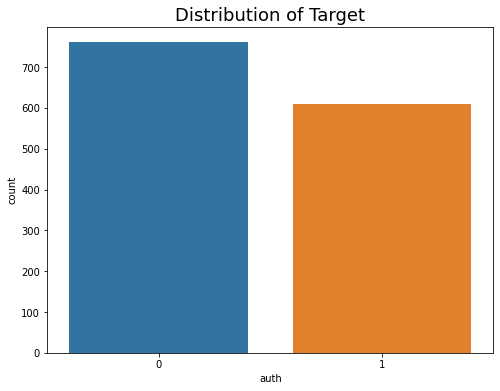

In [16]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [17]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

0    610
1    610
Name: auth, dtype: int64


In [18]:
x = data.loc[:, data.columns != 'auth']
y = data.loc[:, data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [19]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [20]:
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [21]:
y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
columns=["Pred.Negative", "Pred.Positive"],
index=['Act.Negative', "Act.Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            190              3
Act.Positive              1            172

 Accuracy = 98.91%
